In [ ]:
#   Importing the necessary libraries/modules.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import datetime
import xlrd
%matplotlib inline

In [ ]:
qvi_data=pd.read_csv("/content/QVI_data (1).csv")    #   Reading the CSV file into a pandas.DataFrame.
qvi_data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [ ]:
qvi_data.info() #    Getting a concise summary of the pandas.DataFrame.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [ ]:
qvi_data.isnull().sum() #   Checking for any null values in the pandas.DataFrame.


,0
LYLTY_CARD_NBR,0
DATE,0
STORE_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
PACK_SIZE,0
BRAND,0


In [ ]:
qvi_data["YEAR_MONTH"]=pd.to_datetime(qvi_data["DATE"]).dt.to_period("M")   #   Storing the year and month of the recorded duration in a separate column.
qvi_data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,2018-12
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,2018-10
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,2018-10
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,2018-10


In [ ]:
total_sales=qvi_data.groupby(["STORE_NBR", "YEAR_MONTH"])["TOT_SALES"].sum()    #   Grouping the pandas.DataFrame by the STORE_NBR and YEAR_MONTH column, and summing up the total sales for them.
total_sales=total_sales.to_frame()  #   Converting the pandas.Series to a pandas.DataFrame.
total_sales

TOT_SALES
STORE_NBR YEAR_MONTH           
1         2018-07         206.9
          2018-08         176.1
          2018-09         278.8
          2018-10         188.1
          2018-11         192.6
...                         ...
272       2019-02         395.5
          2019-03         442.3
          2019-04         445.1
          2019-05         314.6
          2019-06         312.1

[3169 rows x 1 columns]

In [ ]:
total_customers=qvi_data.groupby(["STORE_NBR", "YEAR_MONTH"])["LYLTY_CARD_NBR"].nunique()   #   Grouping the pandas.DataFrame by the STORE_NBR and YEAR_MONTH column, and counting the unique number of customers for them.
total_customers=total_customers.to_frame()  #   Converting the pandas.Series to a pandas.DataFrame.
total_customers

LYLTY_CARD_NBR
STORE_NBR YEAR_MONTH                
1         2018-07                 49
          2018-08                 42
          2018-09                 59
          2018-10                 44
          2018-11                 46
...                              ...
272       2019-02                 45
          2019-03                 50
          2019-04                 54
          2019-05                 34
          2019-06                 34

[3169 rows x 1 columns]

In [ ]:
transactions_per_customer=qvi_data.groupby(["STORE_NBR", "YEAR_MONTH"])["TXN_ID"].nunique()/qvi_data.groupby(["STORE_NBR", "YEAR_MONTH"])["LYLTY_CARD_NBR"].nunique()   #   Grouping the pandas.DataFrame by the STORE_NBR and YEAR_MONTH column, and counting the unique number of transactions per customer for them.
transactions_per_customer=transactions_per_customer.to_frame()  #   Converting the pandas.Series to a pandas.DataFrame.
transactions_per_customer

0
STORE_NBR YEAR_MONTH          
1         2018-07     1.061224
          2018-08     1.023810
          2018-09     1.050847
          2018-10     1.022727
          2018-11     1.021739
...                        ...
272       2019-02     1.066667
          2019-03     1.060000
          2019-04     1.018519
          2019-05     1.176471
          2019-06     1.088235

[3169 rows x 1 columns]

In [ ]:
dataframe_list=[total_sales, total_customers, transactions_per_customer]    #   Creating a list of all the pandas.DataFrames.
dataframe=pd.concat(dataframe_list, axis=1) #   Concatenating all the pandas.DataFrames into one.
dataframe.columns=["TOT_SALES", "TOT_CUST", "TXN_PER_CUST"] #   Renaming the columns of the pandas.DataFrame.
dataframe

TOT_SALES  TOT_CUST  TXN_PER_CUST
STORE_NBR YEAR_MONTH                                   
1         2018-07         206.9        49      1.061224
          2018-08         176.1        42      1.023810
          2018-09         278.8        59      1.050847
          2018-10         188.1        44      1.022727
          2018-11         192.6        46      1.021739
...                         ...       ...           ...
272       2019-02         395.5        45      1.066667
          2019-03         442.3        50      1.060000
          2019-04         445.1        54      1.018519
          2019-05         314.6        34      1.176471
          2019-06         312.1        34      1.088235

[3169 rows x 3 columns]

In [ ]:
dataframe.isnull().sum() #   Checking for any null values in the pandas.DataFrame.


,0
TOT_SALES,0
TOT_CUST,0
TXN_PER_CUST,0


In [ ]:
recorded_stores=pd.pivot_table(qvi_data, index="STORE_NBR", columns="YEAR_MONTH", values="TXN_ID", aggfunc="count") #   Pivoting the pandas.DataFrame to get all the recorded transactions for each store during the entire duration.
recorded_stores

YEAR_MONTH,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
STORE_NBR,,,,,,,,,,,,
1,52.0,43.0,62.0,45.0,47.0,47.0,36.0,55.0,49.0,43.0,51.0,43.0
2,41.0,43.0,37.0,43.0,40.0,38.0,45.0,32.0,46.0,49.0,50.0,42.0
3,138.0,134.0,119.0,119.0,118.0,129.0,121.0,139.0,130.0,110.0,123.0,122.0
4,160.0,151.0,138.0,155.0,139.0,133.0,168.0,102.0,135.0,137.0,126.0,134.0
5,120.0,112.0,125.0,107.0,111.0,125.0,118.0,106.0,97.0,109.0,104.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,52.0,54.0,34.0,48.0,51.0,43.0,38.0,37.0,47.0,50.0,52.0,40.0
269,139.0,132.0,124.0,148.0,136.0,133.0,144.0,133.0,122.0,139.0,130.0,127.0
270,139.0,154.0,126.0,119.0,133.0,149.0,155.0,125.0,143.0,132.0,128.0,127.0


In [ ]:
recorded_stores.isnull().sum()  #   Checking for any null values in the pandas.DataFrame.


,0
YEAR_MONTH,
2018-07,6
2018-08,9
2018-09,8
2018-10,7
2018-11,8
2018-12,9
2019-01,9
2019-02,8
2019-03,7


In [ ]:
unrecorded_stores=[]
for i in recorded_stores.index:
    if recorded_stores.loc[i].isnull().any():
        unrecorded_stores.append(i)
unrecorded_stores

[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]

In [ ]:
dataframe=dataframe.drop(unrecorded_stores, axis=0)
dataframe

TOT_SALES  TOT_CUST  TXN_PER_CUST
STORE_NBR YEAR_MONTH                                   
1         2018-07         206.9        49      1.061224
          2018-08         176.1        42      1.023810
          2018-09         278.8        59      1.050847
          2018-10         188.1        44      1.022727
          2018-11         192.6        46      1.021739
...                         ...       ...           ...
272       2019-02         395.5        45      1.066667
          2019-03         442.3        50      1.060000
          2019-04         445.1        54      1.018519
          2019-05         314.6        34      1.176471
          2019-06         312.1        34      1.088235

[3120 rows x 3 columns]

In [ ]:
pre_trial_data=dataframe.loc[dataframe.index.get_level_values("YEAR_MONTH")<"2019-02"]  #   Extracting the pandas.DataFrame for the pre-trial duration.
pre_trial_data=pre_trial_data.reset_index()
pre_trial_data

,STORE_NBR,YEAR_MONTH,TOT_SALES,TOT_CUST,TXN_PER_CUST
0,1,2018-07,206.9,49,1.061224
1,1,2018-08,176.1,42,1.023810
2,1,2018-09,278.8,59,1.050847
3,1,2018-10,188.1,44,1.022727
4,1,2018-11,192.6,46,1.021739
...,...,...,...,...,...
1815,272,2018-09,304.7,32,1.125000
1816,272,2018-10,430.6,44,1.136364
1817,272,2018-11,376.2,41,1.097561
1818,272,2018-12,403.9,47,1.000000


In [ ]:
control_stores=pre_trial_data[(pre_trial_data.STORE_NBR!=77 ) & (pre_trial_data.STORE_NBR!=86) & (pre_trial_data.STORE_NBR!=88)][["TOT_SALES", "TOT_CUST", "TXN_PER_CUST"]].groupby(pre_trial_data.STORE_NBR).sum()
control_stores

,TOT_SALES,TOT_CUST,TXN_PER_CUST
STORE_NBR,,,
1,1386.90,317,7.327967
2,1128.50,272,7.359700
3,7526.15,744,8.209829
4,9127.00,849,8.535253
5,5739.70,651,8.791906
...,...,...,...
268,1549.05,304,7.373037
269,6664.50,746,8.921035
270,6697.95,734,9.147187


In [ ]:
trial_stores=pre_trial_data[(pre_trial_data.STORE_NBR==77 ) | (pre_trial_data.STORE_NBR==86) | (pre_trial_data.STORE_NBR==88)][["TOT_SALES", "TOT_CUST", "TXN_PER_CUST"]].groupby(pre_trial_data.STORE_NBR).sum()
trial_stores

,TOT_SALES,TOT_CUST,TXN_PER_CUST
STORE_NBR,,,
77,1699.00,299,7.405289
86,6119.85,697,8.798544
88,9383.60,880,8.523817


In [ ]:
difference=control_stores.loc[control_stores.corrwith(trial_stores.loc[77], method="pearson", axis=1).nlargest(5).index]    #   Getting the pandas.DataFrame for the top five stores with the highest correlation with the trial store.

#   Getting the difference between the trial store and the top five stores with the highest correlation with the trial store.

difference=(trial_stores.loc[77]-difference).sort_values(by="TOT_SALES", ascending=False)
difference["DIFFERENCE"]=difference["TOT_SALES"]-difference["TOT_SALES"].mean()
difference.sort_values(by="DIFFERENCE", ascending=False)    #   Sorting the pandas.DataFrame by the DIFFERENCE column.

,TOT_SALES,TOT_CUST,TXN_PER_CUST,DIFFERENCE
STORE_NBR,,,,
139,1493.2,257.0,0.405289,609.34
135,1486.9,256.0,0.012432,603.04
161,1459.0,252.0,0.405289,575.14
233,39.2,1.0,0.115969,-844.66
46,-59.0,-3.0,0.094215,-942.86


In [ ]:
difference=control_stores.loc[control_stores.corrwith(trial_stores.loc[86], axis=1).nlargest(5).index]  #   Getting the pandas.DataFrame for the top five stores with the highest correlation with the trial store.

#   Getting the difference between the trial store and the top five stores with the highest correlation with the trial store.

difference=(trial_stores.loc[86]-difference).sort_values(by="TOT_SALES", ascending=False)
difference["DIFFERENCE"]=difference["TOT_SALES"]-difference["TOT_SALES"].mean()
difference.sort_values(by="DIFFERENCE", ascending=False)    #   Sorting the pandas.DataFrame by the DIFFERENCE column.

,TOT_SALES,TOT_CUST,TXN_PER_CUST,DIFFERENCE
STORE_NBR,,,,
258,5934.85,670.0,1.798544,4066.46
215,3411.85,386.0,1.486773,1543.46
225,29.25,3.0,0.023669,-1839.14
196,-6.45,1.0,0.040716,-1874.84
57,-27.55,-2.0,0.031815,-1895.94


In [ ]:
difference=control_stores.loc[control_stores.corrwith(trial_stores.loc[88], axis=1).nlargest(5).index]  #   Getting the pandas.DataFrame for the top five stores with the highest correlation with the trial store.

#   Getting the difference between the trial store and the top five stores with the highest correlation with the trial store.

difference=(trial_stores.loc[88]-difference).sort_values(by="TOT_SALES", ascending=False)
difference["DIFFERENCE"]=difference["TOT_SALES"]-difference["TOT_SALES"].mean()
difference.sort_values(by="DIFFERENCE", ascending=False)

,TOT_SALES,TOT_CUST,TXN_PER_CUST,DIFFERENCE
STORE_NBR,,,,
60,1697.1,154.0,0.052504,783.5
75,1420.1,129.0,0.078986,506.5
72,865.1,79.0,0.085871,-48.5
203,439.9,38.0,0.135139,-473.7
165,145.8,18.0,0.093389,-767.8


In [ ]:
#   Extracting the pandas.DataFrames for each of the trial stores.

trial_stores_one=pre_trial_data.loc[pre_trial_data.STORE_NBR.isin([77])].reset_index()
trial_stores_two=pre_trial_data.loc[pre_trial_data.STORE_NBR.isin([86])].reset_index()
trial_stores_three=pre_trial_data.loc[pre_trial_data.STORE_NBR.isin([88])].reset_index()

In [ ]:
#   Extracting the pandas.DataFrames for each of the control stores.

control_stores_one=pre_trial_data.loc[pre_trial_data.STORE_NBR.isin([46])].reset_index()
control_stores_two=pre_trial_data.loc[pre_trial_data.STORE_NBR.isin([57])].reset_index()
control_stores_three=pre_trial_data.loc[pre_trial_data.STORE_NBR.isin([165])].reset_index()

In [ ]:
stores=pd.concat([trial_stores_one, trial_stores_two, trial_stores_three, control_stores_one, control_stores_two, control_stores_three], axis=0)    #   Concatenating all the pandas.DataFrames into one.
stores

,index,STORE_NBR,YEAR_MONTH,TOT_SALES,TOT_CUST,TXN_PER_CUST
0,504,77,2018-07,296.80,51,1.078431
1,505,77,2018-08,255.50,47,1.021277
2,506,77,2018-09,225.20,42,1.047619
3,507,77,2018-10,204.50,37,1.027027
4,508,77,2018-11,245.30,41,1.073171
5,509,77,2018-12,267.30,46,1.043478
6,510,77,2019-01,204.40,35,1.114286
0,560,86,2018-07,892.20,99,1.272727
1,561,86,2018-08,764.05,94,1.170213
2,562,86,2018-09,914.60,103,1.242718


<ipython-input-35-04bec8808286>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="STORE_NBR", y="TOT_SALES", data=stores, ax=axis[0], palette="pastel")
<ipython-input-35-04bec8808286>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="STORE_NBR", y="TOT_CUST", data=stores, ax=axis[1], palette="pastel")
<ipython-input-35-04bec8808286>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="STORE_NBR", y="TXN_PER_CUST", data=stores, ax=axis[2], palette="pastel")


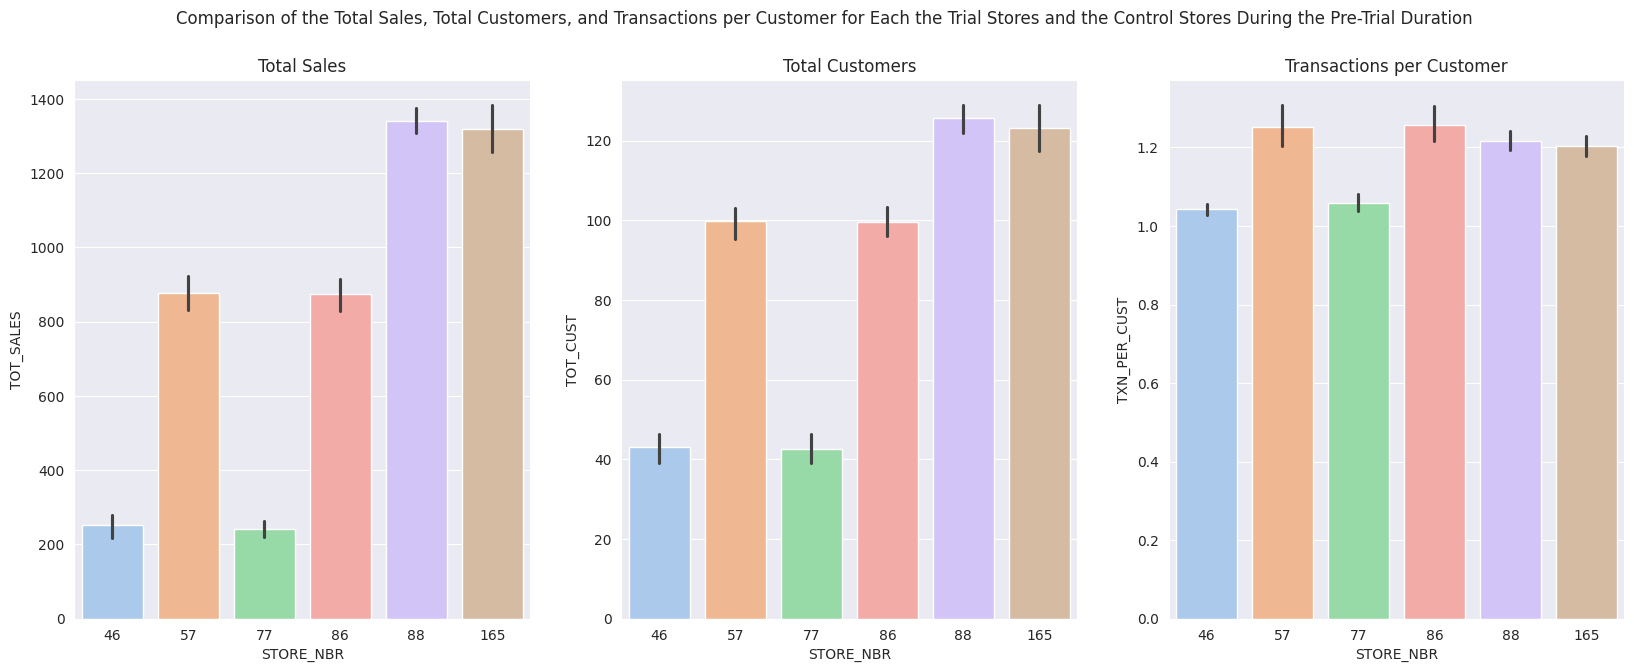

In [ ]:
#   Plotting the bar graphs for the total sales, total customers, and transactions per customer for each of the trial stores and the control stores.

sns.set_style("darkgrid")
figure, axis=plt.subplots(1, 3, figsize=(20, 7))
sns.barplot(x="STORE_NBR", y="TOT_SALES", data=stores, ax=axis[0], palette="pastel")
axis[0].set_title("Total Sales")
sns.barplot(x="STORE_NBR", y="TOT_CUST", data=stores, ax=axis[1], palette="pastel")
axis[1].set_title("Total Customers")
sns.barplot(x="STORE_NBR", y="TXN_PER_CUST", data=stores, ax=axis[2], palette="pastel")
axis[2].set_title("Transactions per Customer")
figure.suptitle("Comparison of the Total Sales, Total Customers, and Transactions per Customer for Each the Trial Stores and the Control Stores During the Pre-Trial Duration")
plt.show()

In [ ]:
trial_data=dataframe.loc[dataframe.index.get_level_values("YEAR_MONTH")>="2019-02"]  #   Extracting the pandas.DataFrame for the trial duration.
trial_data=trial_data.reset_index()
trial_data

,STORE_NBR,YEAR_MONTH,TOT_SALES,TOT_CUST,TXN_PER_CUST
0,1,2019-02,225.4,52,1.057692
1,1,2019-03,192.9,45,1.088889
2,1,2019-04,192.9,42,1.023810
3,1,2019-05,221.4,46,1.108696
4,1,2019-06,174.1,42,1.000000
...,...,...,...,...,...
1295,272,2019-02,395.5,45,1.066667
1296,272,2019-03,442.3,50,1.060000
1297,272,2019-04,445.1,54,1.018519
1298,272,2019-05,314.6,34,1.176471


In [ ]:
#   Extracting the pandas.DataFrames for each of the trial stores.

trial_stores_one=trial_data.loc[trial_data.STORE_NBR.isin([77])].reset_index()
trial_stores_two=trial_data.loc[trial_data.STORE_NBR.isin([86])].reset_index()
trial_stores_three=trial_data.loc[trial_data.STORE_NBR.isin([88])].reset_index()

In [ ]:
#   Extracting the pandas.DataFrames for each of the control stores.

control_stores_one=trial_data.loc[trial_data.STORE_NBR.isin([46])].reset_index()
control_stores_two=trial_data.loc[trial_data.STORE_NBR.isin([57])].reset_index()
control_stores_three=trial_data.loc[trial_data.STORE_NBR.isin([165])].reset_index()

In [ ]:
stores=pd.concat([trial_stores_one, trial_stores_two, trial_stores_three, control_stores_one, control_stores_two, control_stores_three], axis=0)    #   Concatenating all the pandas.DataFrames into one.
stores

,index,STORE_NBR,YEAR_MONTH,TOT_SALES,TOT_CUST,TXN_PER_CUST
0,360,77,2019-02,235.00,45,1.000000
1,361,77,2019-03,278.50,50,1.100000
2,362,77,2019-04,263.50,47,1.021277
3,363,77,2019-05,299.30,55,1.018182
4,364,77,2019-06,264.70,41,1.024390
0,400,86,2019-02,913.20,107,1.289720
1,401,86,2019-03,1026.80,115,1.217391
2,402,86,2019-04,848.20,105,1.200000
3,403,86,2019-05,889.30,104,1.230769
4,404,86,2019-06,838.00,98,1.204082


<ipython-input-40-cc3a210c71c0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="STORE_NBR", y="TOT_SALES", data=stores, ax=axis[0], palette="pastel")
<ipython-input-40-cc3a210c71c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="STORE_NBR", y="TOT_CUST", data=stores, ax=axis[1], palette="pastel")
<ipython-input-40-cc3a210c71c0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="STORE_NBR", y="TXN_PER_CUST", data=stores, ax=axis[2], palette="pastel")


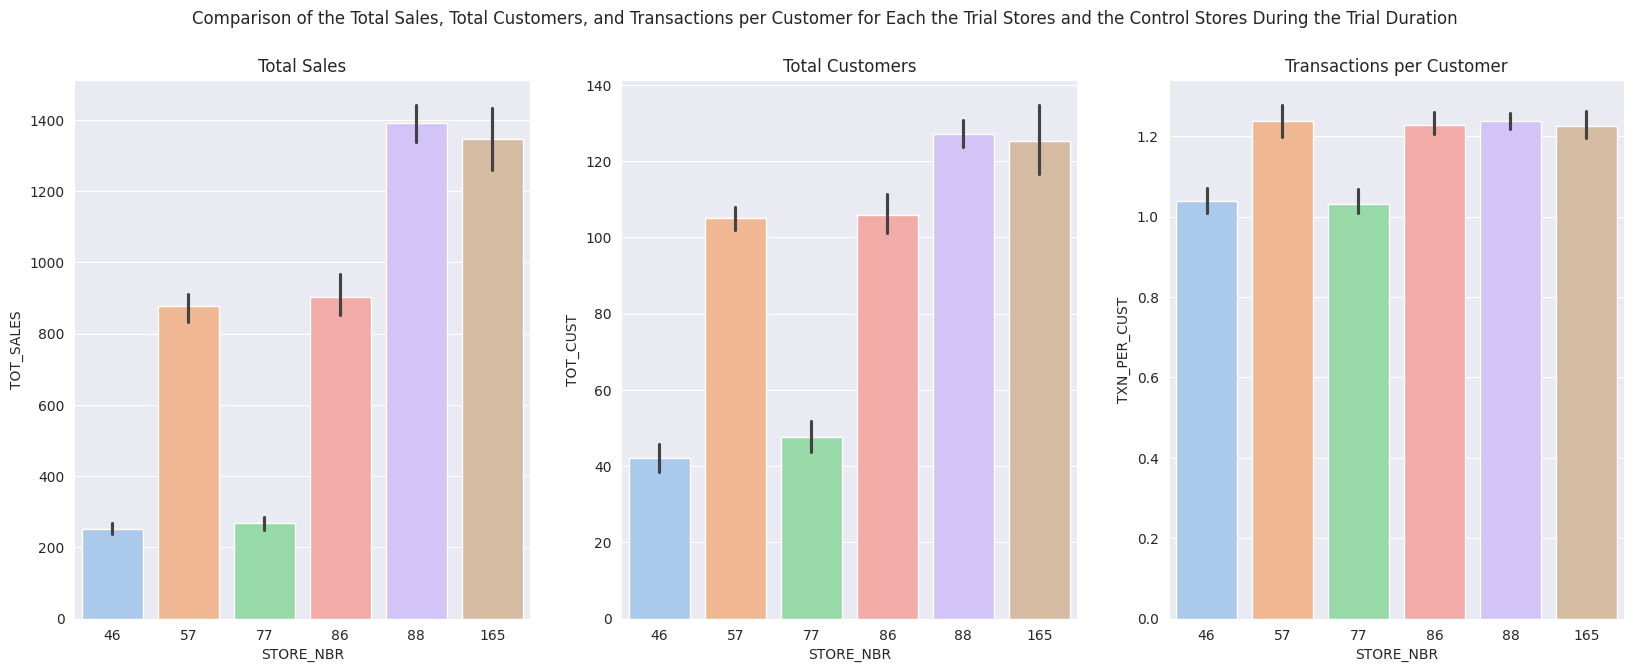

In [ ]:
#   Plotting the bar graphs for the total sales, total customers, and transactions per customer for each of the trial stores and the control stores.

sns.set_style("darkgrid")
figure, axis=plt.subplots(1, 3, figsize=(20, 7))
sns.barplot(x="STORE_NBR", y="TOT_SALES", data=stores, ax=axis[0], palette="pastel")
axis[0].set_title("Total Sales")
sns.barplot(x="STORE_NBR", y="TOT_CUST", data=stores, ax=axis[1], palette="pastel")
axis[1].set_title("Total Customers")
sns.barplot(x="STORE_NBR", y="TXN_PER_CUST", data=stores, ax=axis[2], palette="pastel")
axis[2].set_title("Transactions per Customer")
figure.suptitle("Comparison of the Total Sales, Total Customers, and Transactions per Customer for Each the Trial Stores and the Control Stores During the Trial Duration")
plt.show()